# **ANOMALY DETECTION**

## 1. Importing Libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from datetime import datetime
import plotly.express as px
import os
import plotly.graph_objs as go

## 2. Loading Data

In [135]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
path = "/content/drive/MyDrive/walmart_cleaned.csv"
data = pd.read_csv(path)


## 3. Familiarizing With the Data

In [137]:
# Viewing the Data Frame
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [138]:
# Checking tail of data frame

data.tail()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421569,423285,45,2012-10-26,0,98.0,1076.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [139]:
# Shape of Data

print("Shape of Data:",data.shape)

Shape of Data: (421570, 17)


In [140]:
# Checking Duplicated Data

print("Duplicated Data in Data Set:", data.duplicated().sum())

Duplicated Data in Data Set: 0


In [141]:
# Checking Null Data in Data Set

print("\nNull Data :\n\n", data.isnull().sum())


Null Data :

 Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


We can see above, that there are no Missing Values present in our data

In [142]:
# Checking Unique Values in Each Column data set

print("\nUnique Values in Data:\n\n", data.nunique())


Unique Values in Data:

 Unnamed: 0      421570
Store               45
Date               143
IsHoliday            2
Dept                81
Weekly_Sales    359464
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64


In [143]:
# Checking Data Types in the Data

print("\nData Types in our Data:\n\n", data.dtypes.value_counts())


Data Types in our Data:

 float64    11
int64       5
object      1
dtype: int64


In [144]:
# Checking Columns in data set

print("\nColumns in Data Set:\n\n", data.columns)


Columns in Data Set:

 Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')


In [145]:
#statistical summary of data

data.describe()

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [146]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [147]:
# describe the data
data.describe()

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


## 4. Visualizing the Data
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

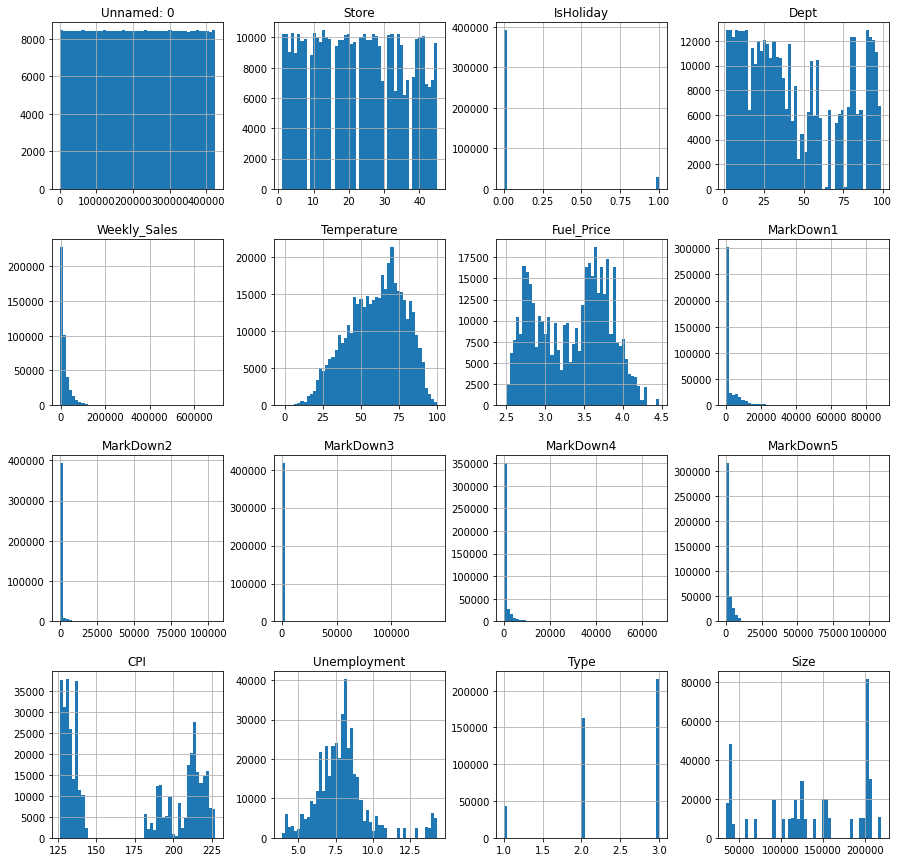

In [148]:
# Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

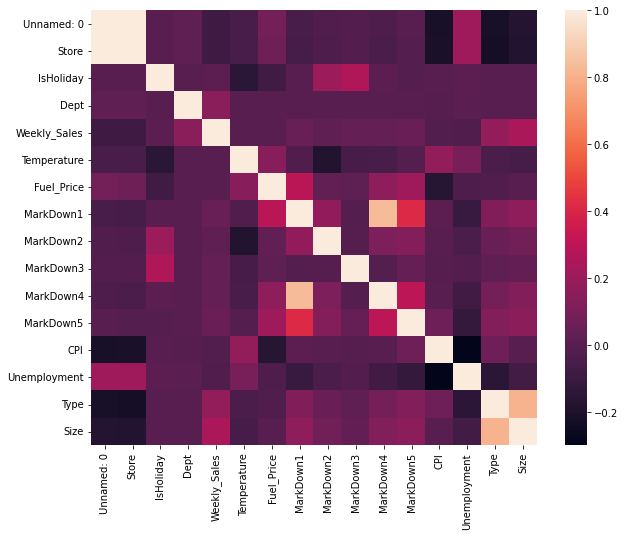

In [149]:
#Correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(data.corr())
plt.show()

## 5. Data Preprocessing

Converting the Date column in Date Time Format

In [150]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Week'] = pd.to_datetime(data['Date']).dt.week
data['DayOfTheWeek'] = data['Date'].dt.dayofweek
data['Day'] = pd.to_datetime(data['Date']).dt.day
data['WeekOfYear'] = (data['Date'].dt.isocalendar().week)*1.0  
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfTheWeek,Day,WeekOfYear
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0


Checking Missing Values

In [151]:
data.isna().sum()

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
DayOfTheWeek    0
Day             0
WeekOfYear      0
dtype: int64

## 6. Exploratory Data Analysis 

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart Store sales. It is cleaned and no NaN values are there.


**Store** - the store number

**Date** - the week of sales

**Weekly_Sales** - sales for the given store

**IsHoliday** - whether the week is a special holiday week (Holiday IF True = 1 if else = 0)

**Dept** - Department Number in each store

**Temperature** - Temperature on the day of sale (In Degree Celsius)

**Fuel_Price** - Cost of fuel in the region (In Dolllars)

**CPI** – Prevailing consumer price index

**Unemployment** - Prevailing unemployment rate

**Size** - Size of the store

**Type** - Depends on the size. Unique Values {1,2,3}


The Holiday Events are :

**Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

**Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

**Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

**Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [152]:
data

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfTheWeek,Day,WeekOfYear
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,...,192.308899,8.667,2,118221,2012,10,43,4,26,43.0
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,...,192.308899,8.667,2,118221,2012,10,43,4,26,43.0
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,...,192.308899,8.667,2,118221,2012,10,43,4,26,43.0
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,...,192.308899,8.667,2,118221,2012,10,43,4,26,43.0


**Total Number of Walmart Stores**

In [153]:
print("Total No. of Walmart Stores = " , len(data['Store'].unique() ))

Total No. of Walmart Stores =  45


**Total Number of Departments**

In [154]:
print("Total No. of Departments = " , len(data['Dept'].unique() ))

Total No. of Departments =  81


**Total Types of Walmart Stores**

In [155]:
print("Total Types of Walmart Stores = " , len(data['Type'].unique() ))

Total Types of Walmart Stores =  3


**Visualizing Popularity of Store Types**

In [156]:
typecounts = data.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Type', 'Counts'])

fig = px.pie(df, values='Counts', names='Type',
             title='Popularity of Store Types',labels='Type', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Insights:

Type A stores are more popular than the Type B and Type C 

### **Plottinng Sales Per Year**

In [157]:
# Check sales per year

df_tg = data.groupby('Year').agg({'Weekly_Sales':'sum'})
fig = px.bar(df_tg,
            color_discrete_sequence=["#DC143C"], template="plotly_white", height=600, width=600)
fig.update_xaxes(title='Year', dtick='Year')
fig.update_yaxes(title='sum_weekly_sales')

## **Plotting Average Sales - Store Type**

In [158]:

avgweeklysales = data.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Type', 'AvgSales'])

fig = px.bar(df, 
             x="Type", 
             y="AvgSales",  
             title="Average Sales - Per Store Type",
             color='AvgSales', color_continuous_scale='Burg', template="plotly_white", height=600, width=600)
fig.show()

Insights:

In terms of sales, type A stores are superior than the other two types

## **Plotting Average Sales - Per Store**

In [159]:
store_sales = data.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(store_sales, 
             x=store_sales.index, 
             y=store_sales.values,  
             title="Average Sales - Per Store",
             labels={'x':'Stores', 'y':'Sales'},
              color='Weekly_Sales', color_continuous_scale='YlOrRd')

fig.update_xaxes(tick0=1, dtick=1)

fig.show()

## **Average Weekly Sales - Per Year**

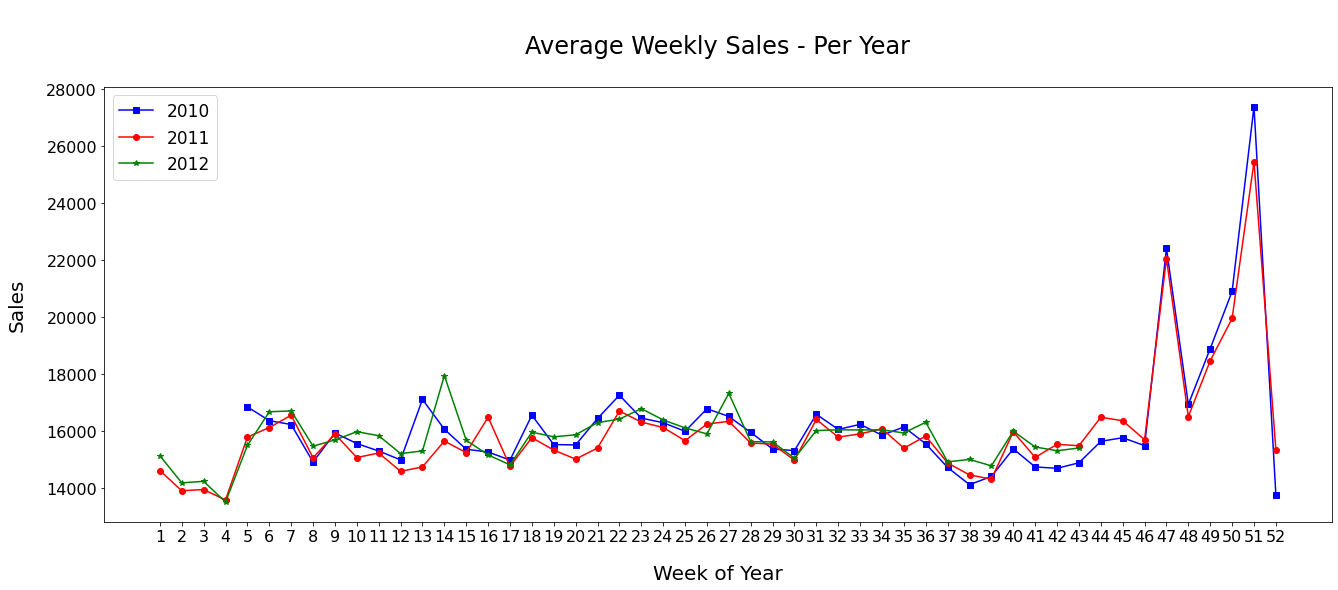

In [160]:
weekly_sales_2010 = data[data.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = data[data.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = data[data.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("\nAverage Weekly Sales - Per Year\n", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=17);

## **Average Monthly Sales - Per Year**

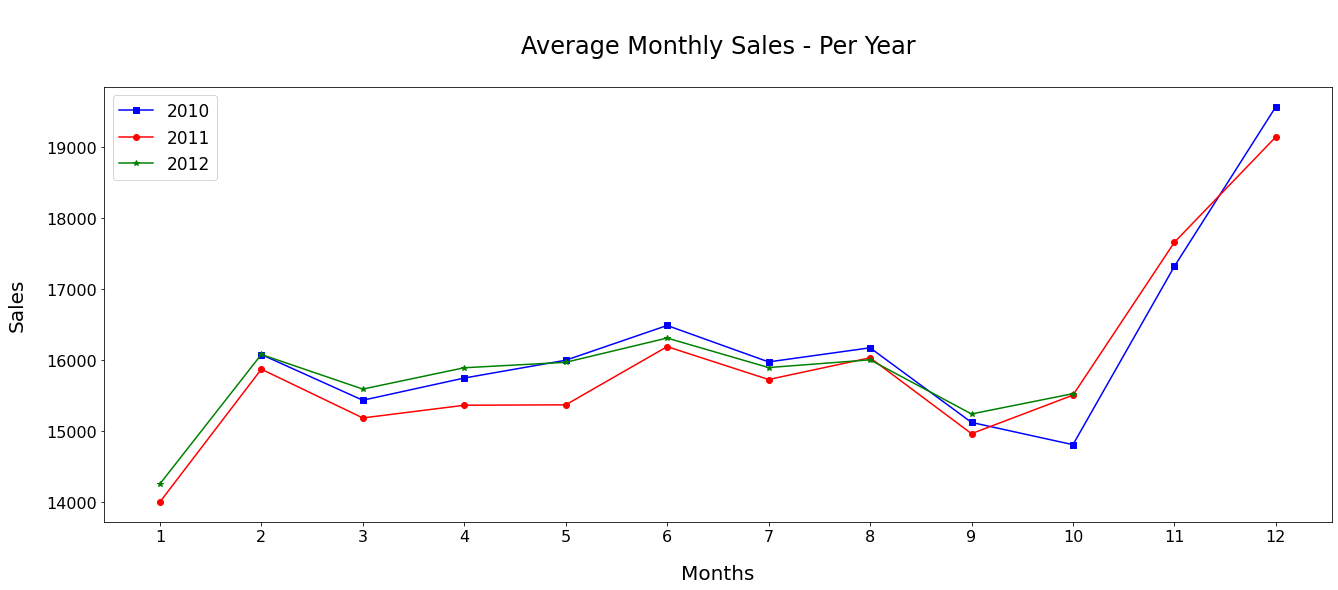

In [161]:
monthly_sales_2010 = data[data.Year==2010].groupby('Month')['Weekly_Sales'].mean()
monthly_sales_2011 = data[data.Year==2011].groupby('Month')['Weekly_Sales'].mean()
monthly_sales_2012 = data[data.Year==2012].groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(monthly_sales_2010.index, monthly_sales_2010.values, 's-b')
plt.plot(monthly_sales_2011.index, monthly_sales_2011.values, 'o-r')
plt.plot(monthly_sales_2012.index, monthly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 13, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Months', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("\nAverage Monthly Sales - Per Year\n", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=17);

### **Average Store Sales - Year Wise**

In [162]:
from plotly.subplots import make_subplots

store_sales_2010 = data[data.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = data[data.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 = data[data.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Store Sales 2010", "Average Store Sales 2011", "Average Store Sales 2012"))


fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),  showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="AvgSales", row=1, col=1)
fig.update_yaxes(title_text="AvgSales", row=2, col=1)
fig.update_yaxes(title_text="AvgSales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

#template='plotly_white'

### **Average Sales - Per Department**

In [163]:
# Average Sales per Dept
sales_dept = data.groupby('Dept').agg({'Weekly_Sales':'mean'})
sales_dept.reset_index(inplace=True)
sales_dept.sort_values('Weekly_Sales', inplace=True, ascending=False)

fig = px.bar(sales_dept, y='Weekly_Sales', x='Dept', color='Weekly_Sales',
             color_continuous_scale='Bluered_r')

fig.update_layout(title='Average Sales per Department')
fig.update_xaxes(dtick=sales_dept['Dept'])
fig.show()

### **Relationship: Size of Store vs Sales**

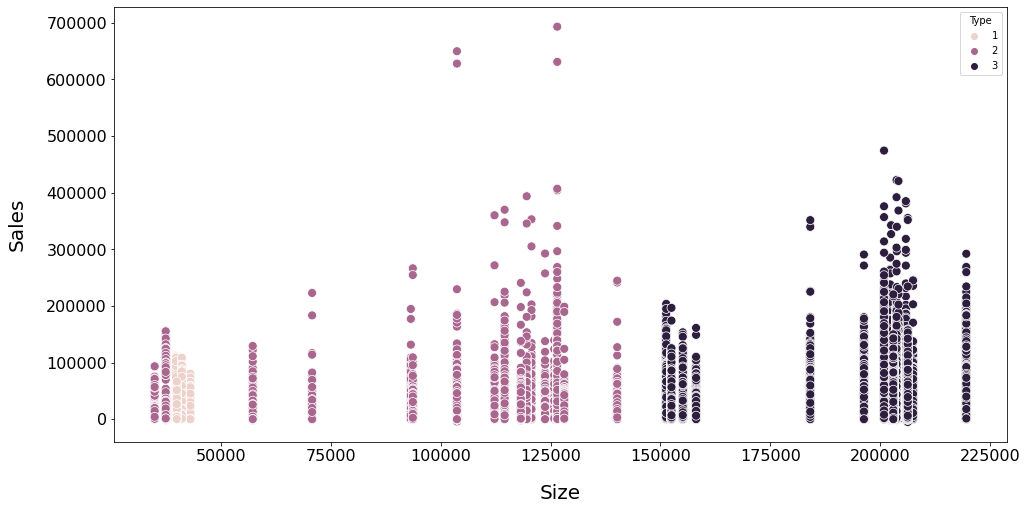

In [164]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=data.Size, y=data.Weekly_Sales, hue=data.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

### **Relationship: Temperature vs Sales**

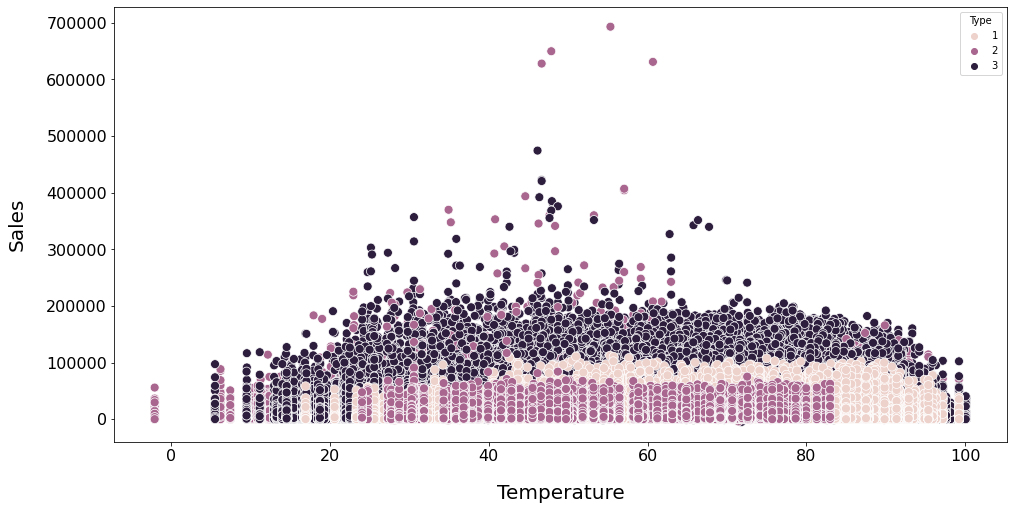

In [165]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=data.Temperature, y=data.Weekly_Sales, hue=data.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

There seems to be no relatiobship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship

### **Relationship: Fuel Price vs Sales**

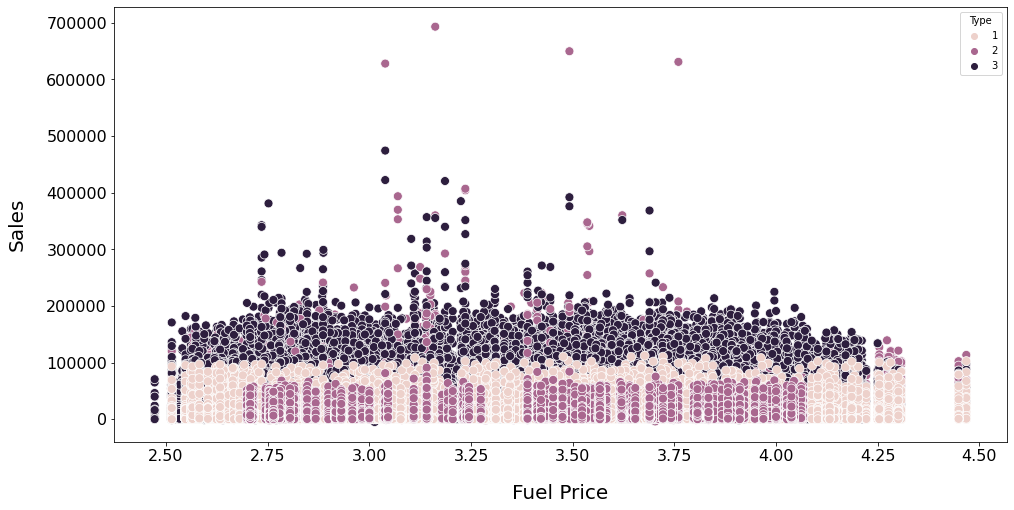

In [166]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=data.Fuel_Price, y=data.Weekly_Sales, hue=data.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

### **Relationship: CPI vs Sales**

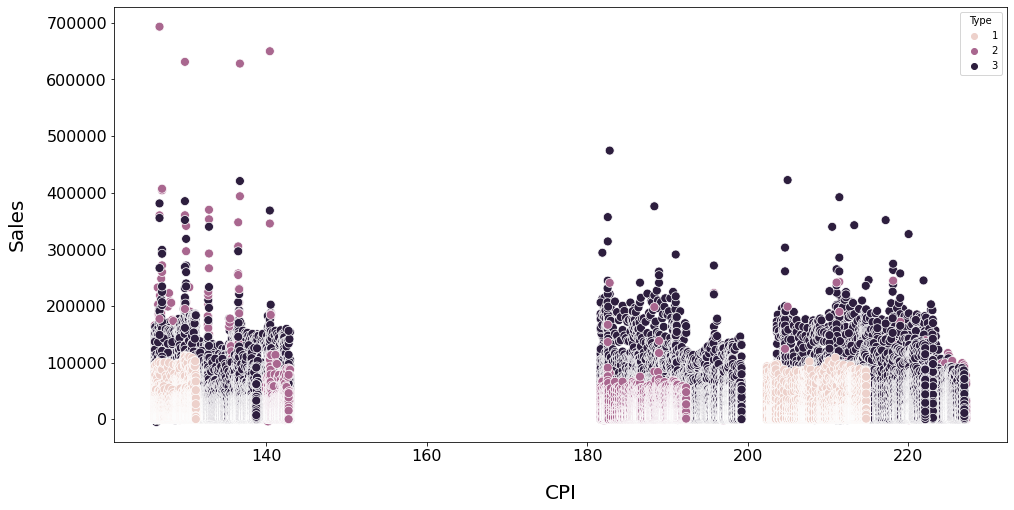

In [167]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=data.CPI, y=data.Weekly_Sales, hue=data.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

### **Relationship: Unemployment vs Sales**

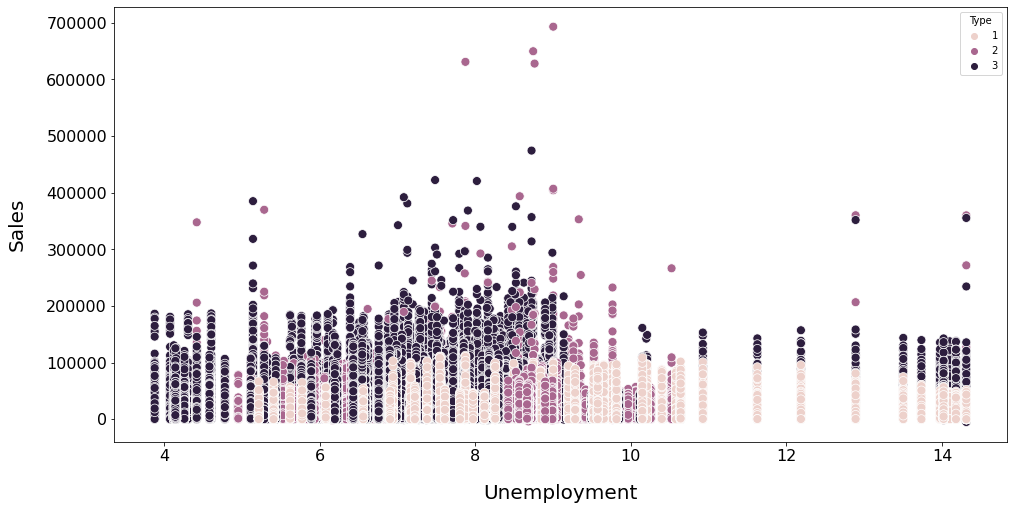

In [168]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=data.Unemployment, y=data.Weekly_Sales, hue=data.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

## **Checking Sales Per week, Per Month, Per Year w.r.t Holidays**

In [169]:
# Find Holidays' week_number
df_holiday = data[data['IsHoliday']==1]
df_holiday['Week'].value_counts()

6     8895
36    8861
47    5959
52    5946
Name: Week, dtype: int64

Conclusion :

SuperBowl - week 6

Labor Day - week 36

Thanksgiving - week 47

Christmas - week 52

In [170]:
# Check sales per week, per month, per year 

df_tg = data.groupby(['Week','Year']).agg({'Weekly_Sales':'sum'})
df_tg.reset_index(inplace=True)
df_tg['Week']= df_tg['Week'].astype(str) # from int to str to plot
df_tg['year']= df_tg['Year'].astype(str) # from int to str to plot

fig = px.line(df_tg,x='Week', y='Weekly_Sales', color = 'Year')

fig.update_xaxes(title='Week')
fig.update_yaxes(title='sum_weekly_sales')

# pick Holidays week_number points
df_points = data.loc[data['Week'].isin([6,36,47,52]),['Week','Weekly_Sales']]

# add  markers of special holidays weeks
fig.add_traces(
    go.Scatter(
        x=df_points['Week'], y=df_points['Weekly_Sales'], mode="markers", name="Holiday Weeks - Friday"
    )
)
fig.show()

Conclusions

We can check a substantial increase in sales just before holiday weeks, specially thanksgiving and christmas

There is no weekly sales data for 2012 after 2012-Nov-01

Week 13-16 (Apr), there is a peak. 

Week 26-27 (Jul), there is a peak. 

# **7. Model Building**

In [171]:
data

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfTheWeek,Day,WeekOfYear
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,...,211.096358,8.106,3,151315,2010,2,5,4,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,...,192.308899,8.667,2,118221,2012,10,43,4,26,43.0
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,...,192.308899,8.667,2,118221,2012,10,43,4,26,43.0
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,...,192.308899,8.667,2,118221,2012,10,43,4,26,43.0
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,...,192.308899,8.667,2,118221,2012,10,43,4,26,43.0


In [172]:
!pip install pystan==2.18.0.0
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
from fbprophet import Prophet
data.head()
fbp_df=data[['Weekly_Sales','Date']]

In [174]:
split_date = '01-Jan-2012'
fb_train = fbp_df.loc[fbp_df.Date <= split_date].copy()
fb_test = fbp_df.loc[fbp_df.Date > split_date].copy()

In [175]:
df_fb_prop = fb_train[['Weekly_Sales','Date']]

In [176]:
df_fb_prop.columns = ['y', 'ds']
fb_test.columns=['y', 'ds']
df_fb_prop.head(n=2)

,y,ds
0,24924.50,2010-02-05
1,11737.12,2010-02-05


In [177]:
clean_df = df_fb_prop[0:50000]
fb_test=fb_test[0:50000]

In [178]:
clean_df.tail()

,y,ds
70687,13627.93,2010-08-13
70688,12672.35,2010-08-13
70689,6134.81,2010-08-13
70690,2554.26,2010-08-13
70691,2825.44,2010-08-13


Displaying Prophet plot


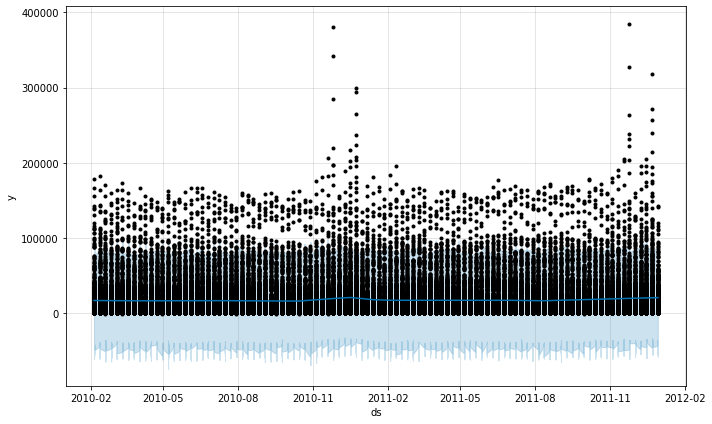

In [179]:
interval_width = 0.99
changepoint_range = 0.8
m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
            seasonality_mode = 'multiplicative', 
            interval_width = interval_width,
            changepoint_range = changepoint_range)
m = m.fit(clean_df)

forecast = m.predict(clean_df)
forecast['fact'] = clean_df['y'].reset_index(drop = True)
print('Displaying Prophet plot')
fig1 = m.plot(forecast)

In [180]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
print(f"Mean Squared Error (MSE): %.2f" % (mean_squared_error(y_true = clean_df["y"], y_pred = forecast['yhat']))) 
print(f"Mean Absolute Error (MAE): %.2f" % (mean_absolute_error(y_true = clean_df["y"], y_pred = forecast['yhat']))) 

Mean Squared Error (MSE): 660090108.61
Mean Absolute Error (MAE): 17069.49


In [181]:
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where

In [182]:
df_svm = data[["Weekly_Sales","Date"]]
df_svm['Date']=df_svm[('Date')].values.astype("float64")
df_svm

,Weekly_Sales,Date
0,24924.50,1.265328e+18
1,11737.12,1.265328e+18
2,13223.76,1.265328e+18
3,37.44,1.265328e+18
4,1085.29,1.265328e+18
...,...,...
421565,26240.14,1.351210e+18
421566,2660.02,1.351210e+18
421567,4131.54,1.351210e+18
421568,717.82,1.351210e+18


In [183]:
# model specification
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df_svm)

In [184]:
# prediction
y_pred = model.predict(df_svm)
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [185]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df_svm.iloc[outlier_index]
outlier_values

,Weekly_Sales,Date
0,24924.50,1.265328e+18
1,11737.12,1.265328e+18
2,13223.76,1.265328e+18
3,37.44,1.265328e+18
4,1085.29,1.265328e+18
...,...,...
421565,26240.14,1.351210e+18
421566,2660.02,1.351210e+18
421567,4131.54,1.351210e+18
421568,717.82,1.351210e+18


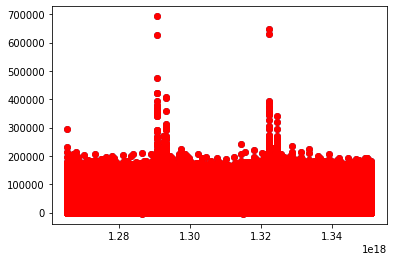

In [186]:
plt.scatter(df_svm["Date"], df_svm["Weekly_Sales"])
plt.scatter(outlier_values["Date"], outlier_values["Weekly_Sales"], color='r')
plt.show()

In [187]:
from sklearn.ensemble import IsolationForest

In [188]:
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.2))
model.fit(df_svm[["Weekly_Sales", "Date"]])

IsolationForest(contamination=0.2, n_estimators=1000)

In [189]:
df2 = df_svm.copy()

In [190]:
df2['scores']=model.decision_function(df2[['Weekly_Sales',"Date"]])


In [191]:
df2['anomaly']=model.predict(df_svm[['Weekly_Sales',"Date"]])
df2.head(20)

,Weekly_Sales,Date,scores,anomaly
0,24924.50,1.265328e+18,-0.073849,-1
1,11737.12,1.265328e+18,-0.047534,-1
2,13223.76,1.265328e+18,-0.051217,-1
3,37.44,1.265328e+18,-0.044794,-1
4,1085.29,1.265328e+18,-0.039079,-1
5,46729.77,1.265328e+18,-0.115086,-1
6,21249.31,1.265328e+18,-0.067142,-1
7,32229.38,1.265328e+18,-0.089867,-1
8,7659.97,1.265328e+18,-0.038678,-1
9,21084.08,1.265328e+18,-0.066539,-1


In [192]:
df_filtered = df2.loc[df2['anomaly'] != -1]

In [193]:
outliers = df2.loc[df2['anomaly'] == -1]
outlier_index = list(outliers.index)

#datapoints classified -1 are anomalous
df2['anomaly'].value_counts()

 1    337256
-1     84314
Name: anomaly, dtype: int64

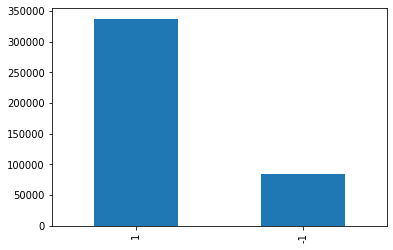

In [194]:
df2['anomaly'].value_counts().plot(kind = 'bar')

In [195]:
df2[df2['anomaly']== -1].shape[0]/data.shape[0]*100

20.0

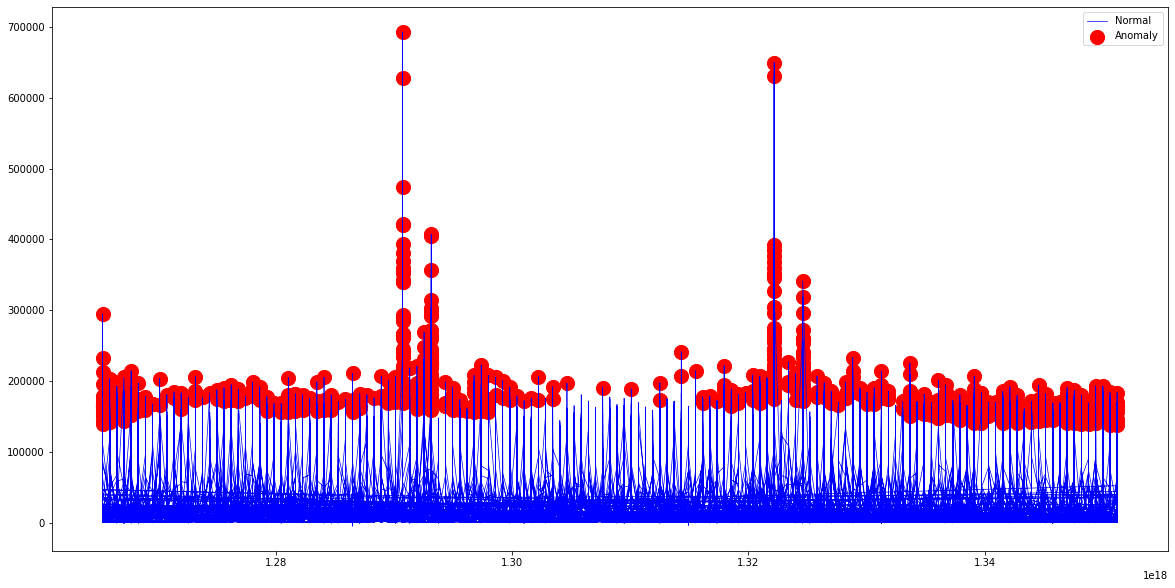

In [196]:
import altair as alt
from sklearn.preprocessing import StandardScaler
alt.renderers.enable('default')
data = df_svm[['Weekly_Sales',"Date"]]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
outliers_fraction = 0.002
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

df_svm['anomaly2'] = pd.Series(model.predict(data))
# df['anomaly2'] = df['anomaly2'].map( {1: 0, -1: 1} )

fig, ax = plt.subplots(figsize=(20,10))

a = df_svm.loc[df_svm['anomaly2'] == -1, ['Weekly_Sales',"Date"]] #anomaly

ax.plot(df_svm['Date'], df_svm['Weekly_Sales'], color='blue', label = 'Normal',linewidth=0.7)
ax.scatter(a['Date'],a['Weekly_Sales'], color='red', label = 'Anomaly', s = 200)
plt.legend()
plt.show();

In [197]:
mini, maxi = df_svm.loc[df_svm['anomaly2'] != -1]['Weekly_Sales'].min(), df_svm.loc[df_svm['anomaly2'] != -1]['Weekly_Sales'].max()
mm = round(df_svm.loc[df_svm['anomaly2'] != -1]['Weekly_Sales'].mean(), 2)
print('Mean normal = ', mm)
print('Minimum normal = ', mini)
print('Maximum normal = ', maxi)



Mean normal =  15641.2
Minimum normal =  -4988.94
Maximum normal =  186204.36


In [198]:
mini, maxi = a['Weekly_Sales'].min(), a['Weekly_Sales'].max()
mm = round(a['Weekly_Sales'].mean(), 2)
print('Mean outlier = ', mm)
print('Minimum outlier = ', mini)
print('Maximum outlier = ', maxi)

Mean outlier =  188152.4
Minimum outlier =  137768.88
Maximum outlier =  693099.36


In [199]:
X = df_svm[['Weekly_Sales',"Date"]]
Y = df_svm["anomaly2"]
print(X.shape)
print(Y.shape)

(421570, 2)
(421570,)


In [200]:
scores_prediction = model.decision_function(X)
y_pred = model.predict(X)

In [201]:
from sklearn.metrics import accuracy_score , classification_report
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
# Run Classification Metrics
print("{}: {}".format("Isolation Forest",n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

Isolation Forest: 5285
Accuracy Score :
0.9874635291885097
Classification Report :
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       831
           0       0.00      0.00      0.00         0
           1       1.00      0.99      0.99    420739

    accuracy                           0.99    421570
   macro avg       0.33      0.33      0.33    421570
weighted avg       1.00      0.99      0.99    421570

